# Transfer from walking to other tasks

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
import numpy as np
%matplotlib inline

In [23]:
tasks = ["BridgeWalker-v0", "CustomCarrier-v0", "PlatformJumper-v0", "CaveCrawler-v0"
         ]

In [24]:
evo_dfs = []
sampling = "all"
for task in tasks:
    processed_task = task.replace("-v0", "").lower()
    for seed in range(10):
        try:
            tmp_df = pd.read_csv(f"../results/me_nn/PCA-evo-body-10x10-{processed_task}-{sampling}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_me"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("me", task, seed)

        try:
            tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-{processed_task}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_ga"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("ga", task, seed)
evo_df = pd.concat(evo_dfs, ignore_index=True)
evo_df.head()

,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,seed,task,sampling,repertoire
0,1,0.729593,4.107603,3.180826,-2.729089,3.125000,5.859375,2.441406,16.063047,2024-12-15 02:23:21.035042,0.0,0,BridgeWalker-v0,evo_me,all
1,2,0.729593,7.045090,5.852021,-4.464395,3.125000,7.714844,2.929688,10.360067,2024-12-15 02:23:31.395462,0.0,0,BridgeWalker-v0,evo_me,all
2,3,0.729593,8.622374,11.778327,-5.439826,3.320312,9.863281,3.222656,10.696720,2024-12-15 02:23:42.092719,0.0,0,BridgeWalker-v0,evo_me,all
3,4,0.729593,9.434374,16.245940,-6.441874,3.417969,11.230469,3.320312,10.675258,2024-12-15 02:23:52.768443,0.0,0,BridgeWalker-v0,evo_me,all
4,5,0.767838,10.914474,16.354479,-5.442212,3.417969,12.109375,3.417969,10.541582,2024-12-15 02:24:03.310500,0.0,0,BridgeWalker-v0,evo_me,all


## Processing time

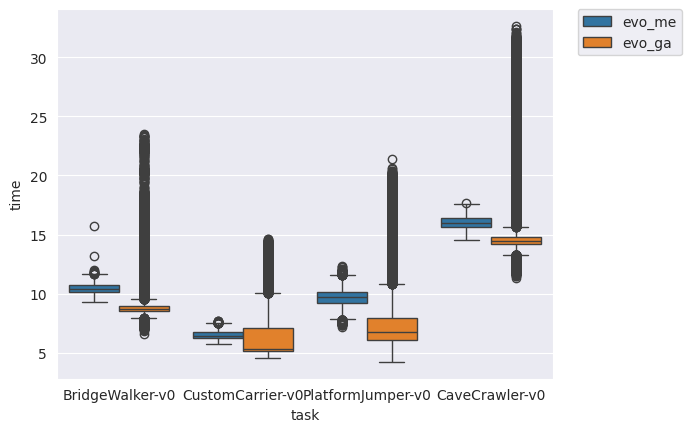

In [25]:
sns.boxplot(
    evo_df[evo_df["iteration"] > 5],
    x="task",
    y="time",
    hue="sampling",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Evolution results

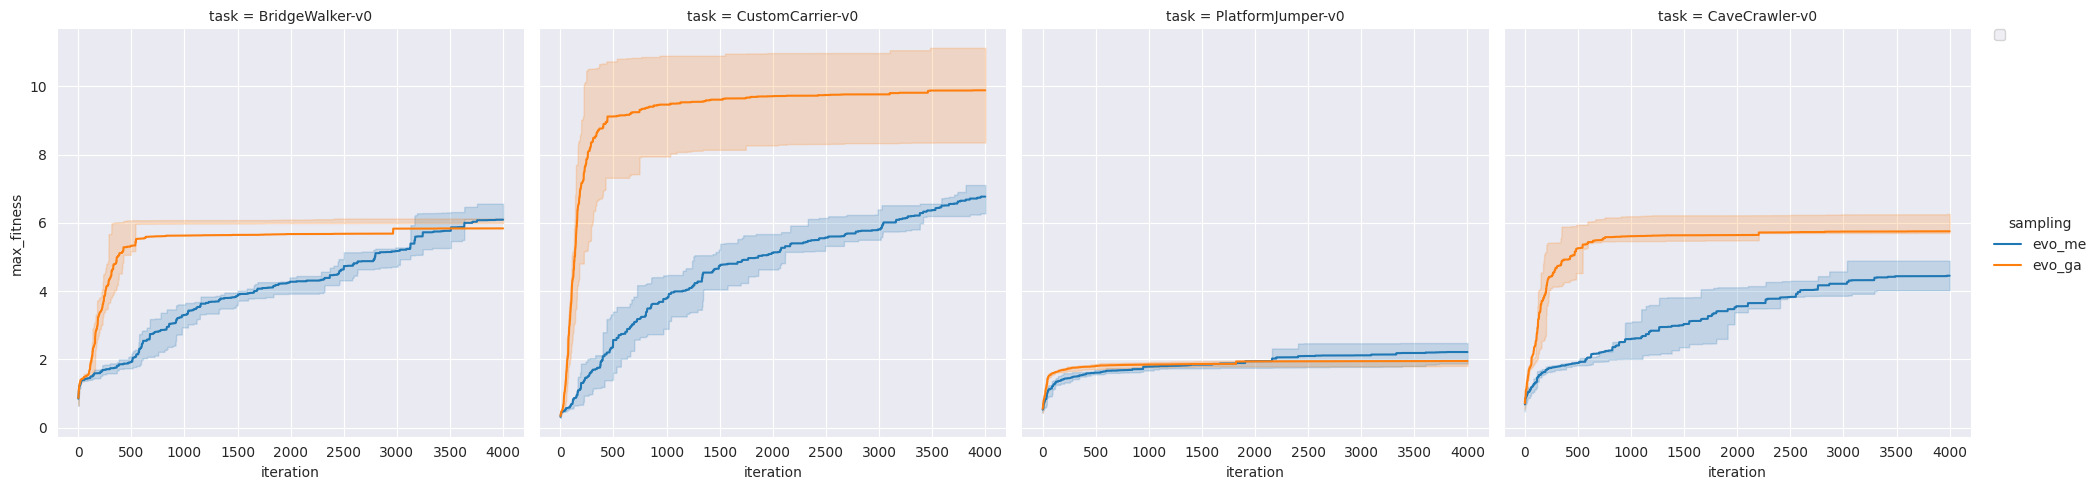

In [26]:
sns.relplot(
    data=evo_df, x="iteration", y="max_fitness", col="task",
    hue="sampling", kind="line", errorbar=("pi", 50),
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()

In [27]:
final_evo_df = evo_df[evo_df["iteration"] == max(evo_df["iteration"])][
    ["max_fitness", "coverage1", "coverage2", "coverage3", "task", "seed", "sampling", "repertoire"]]
final_evo_df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,4.980334,100.00000,53.808594,32.617188,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.518347,91.60156,55.468750,35.742188,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.686930,100.00000,54.199220,27.734375,BridgeWalker-v0,2,evo_me,all


## Task transfer results

In [28]:
dfs = [final_evo_df]
samplings = ["all", "s1", "s2", "s3"]
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for seed in range(10):
        tmp_df = pd.read_csv(f"../results/transfer_nn/ga_evo-body-nn-10x10-walker_{seed}_{task}.csv")
        tmp_df["seed"] = seed
        tmp_df["task"] = task
        tmp_df["sampling"] = "ga"
        tmp_df["repertoire"] = "all"
        tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(lambda x: float(x.replace("[", "").replace("]", "")))
        dfs.append(tmp_df)

        for sampling in samplings:
            for rep in repertoires:
                tmp_df = pd.read_csv(
                    f"../results/transfer_nn_pca/me_PCA-evo-body-10x10-walker-{sampling}_{seed}_{rep}_{task}.csv")
                tmp_df["seed"] = seed
                tmp_df["task"] = task
                tmp_df["sampling"] = sampling
                tmp_df["repertoire"] = rep
                dfs.append(tmp_df)
df = pd.concat(dfs)
df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,4.980334,100.00000,53.808594,32.617188,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.518347,91.60156,55.468750,35.742188,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.686930,100.00000,54.199220,27.734375,BridgeWalker-v0,2,evo_me,all


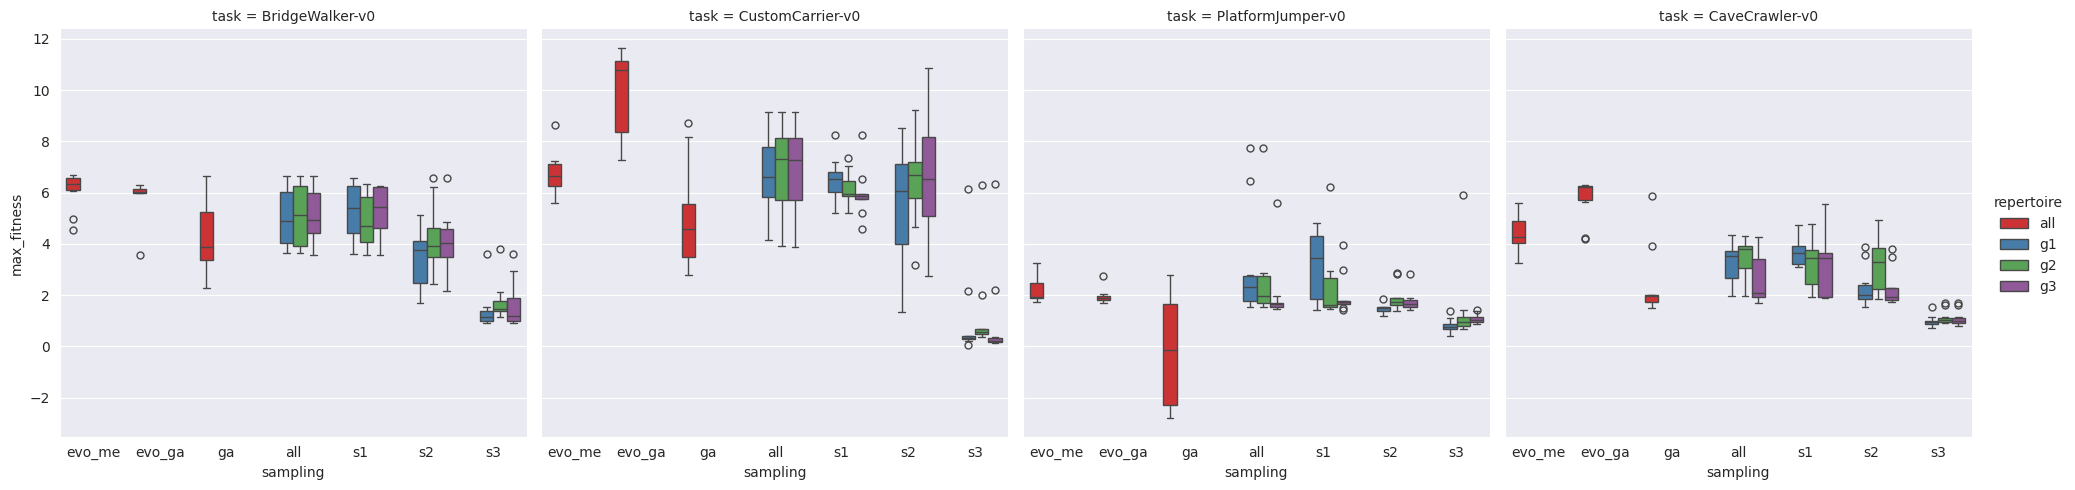

In [29]:
sns.catplot(df,
            x="sampling",
            y="max_fitness",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()

In [30]:
from pathlib import Path
import yaml
from bbbqd.body.body_utils import compute_body_mask, compute_body_float_genome_length, compute_body_encoding_function

seed = 0
dest_rep = "r2"
sampling = "all"
for task in tasks:
    print(task.replace("-v0", ""), end=" & &")
    for origin_rep_id in range(1, 4):
        origin_rep = f"g{origin_rep_id}"
        folder = f"../results/transfer_nn_pca/me_PCA-evo-body-10x10-walker-{sampling}_{seed}_{origin_rep}_{task}"
        config = yaml.load(Path(f"{folder}/config.yaml").read_text(), Loader=yaml.FullLoader)
        body_encoding_fn = compute_body_encoding_function(config)
        fitnesses = jnp.load(f"{folder}/{dest_rep}_fitnesses.npy")
        genotypes = jnp.load(f"{folder}/{dest_rep}_genotypes.npy")
        best_genotype = genotypes[jnp.argmax(fitnesses)]
        body_mask_length = len(compute_body_mask(config))
        body_float_length = compute_body_float_genome_length(config)
        body_genome, controller_genome = jnp.split(best_genotype, [body_mask_length + body_float_length])
        body = body_encoding_fn(body_genome)
        body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=0)), axis=1)  # remove empty columns
        body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=1)), axis=0)  # remove empty rows
        h, w = body.shape
        body_string = "-".join("".join(map(str, r)) for r in body)
        latex_command = f"\\vsrevogym{{{w}}}{{{h}}}{{{body_string}}}"
        print(latex_command, end=" & ")
    print()

BridgeWalker & &\vsrevogym{7}{7}{0000044-0040430-0220400-0122400-1003400-3143000-0400000} & \vsrevogym{6}{6}{001243-432410-002400-410400-121400-044000} & \vsrevogym{7}{7}{0003411-0031310-0001300-0020400-0021400-3342000-2000000} & 
CustomCarrier & &\vsrevogym{6}{7}{003431-031310-001300-110400-021400-342000-040000} & \vsrevogym{8}{7}{00000044-00040130-00040400-00032400-32031400-04123000-00200000} & \vsrevogym{7}{6}{0002412-0032340-0000300-0110400-3344400-2022000} & 
PlatformJumper & &\vsrevogym{5}{6}{02413-02421-00143-00440-03144-24020} & \vsrevogym{6}{6}{133300-344000-304000-313411-214000-304000} & \vsrevogym{5}{6}{00422-02421-00443-00344-04344-24040} & 
CaveCrawler & &\vsrevogym{10}{6}{0000041444-3404330400-0443000400-0440000000-3400000000-3000000000} & \vsrevogym{8}{9}{00000004-00000002-00000014-00000240-00000400-00242400-02002400-21422000-00400000} & \vsrevogym{9}{7}{000000022-000000240-000000400-110002400-032001400-023121000-002400000} & 


In [31]:
from pathlib import Path
import yaml
from bbbqd.body.body_utils import compute_body_mask, compute_body_float_genome_length, compute_body_encoding_function

seed = 0
dest_rep = "r2"
sampling = "all"
for task in ["walker"] + tasks:
    print(task.replace('-v0', ''), end=" ")
    folder = f"../results/me_nn/PCA-evo-body-10x10-{task.replace('-v0', '').lower()}-{sampling}_{seed}"
    config = yaml.load(Path(f"{folder}/config.yaml").read_text(), Loader=yaml.FullLoader)
    body_encoding_fn = compute_body_encoding_function(config)
    fitnesses = jnp.load(f"{folder}/{dest_rep}_fitnesses.npy")
    genotypes = jnp.load(f"{folder}/{dest_rep}_genotypes.npy")
    best_genotype = genotypes[jnp.argmax(fitnesses)]
    body_mask_length = len(compute_body_mask(config))
    body_float_length = compute_body_float_genome_length(config)
    body_genome, controller_genome = jnp.split(best_genotype, [body_mask_length + body_float_length])
    body = body_encoding_fn(body_genome)
    body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=0)), axis=1)  # remove empty columns
    body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=1)), axis=0)  # remove empty rows
    h, w = body.shape
    body_string = "-".join("".join(map(str, r)) for r in body)
    latex_command = f"\\vsrevogym{{{w}}}{{{h}}}{{{body_string}}}"
    print(latex_command)

walker \vsrevogym{8}{7}{24400400-30420311-00220400-00343400-00100000-00300000-00400000}
BridgeWalker \vsrevogym{5}{7}{00032-00304-04204-00324-00044-01334-31430}
CustomCarrier \vsrevogym{8}{7}{00300000-41420000-02010000-33000100-03333320-00000414-00000020}
PlatformJumper \vsrevogym{5}{9}{02400-14000-43300-24234-01440-04000-03000-41000-40000}
CaveCrawler \vsrevogym{10}{6}{0000043233-0024334144-0040000000-0040000000-3440000000-2400000000}
